In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [6]:
cars = pd.read_csv('CarPrice_Assignment.csv')
pd.set_option('display.max_columns', None)#with this code, we are displaying all columns
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
cars['CarName'] = cars['CarName'].apply(lambda x: x.split(' ')[0])
cars.rename(columns={'CarName' : 'CompanyName'},inplace=True)
#we only kept company name in CarName column and changed column name to CompanyName

In [8]:
cars.CompanyName.unique()
#as we can see we have maxda, Nissan and nissan, voskswagen so we have to change these.

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [9]:
cars.CompanyName = cars.CompanyName.str.lower()

def replace_name(a,b):
    cars.CompanyName.replace(a,b,inplace=True)
    
replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')
#we changed some corruptions in the names of company names.

In [10]:
cars.duplicated()
#checking for exactly same row so we can delete it but we don't have one.

0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Length: 205, dtype: bool

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


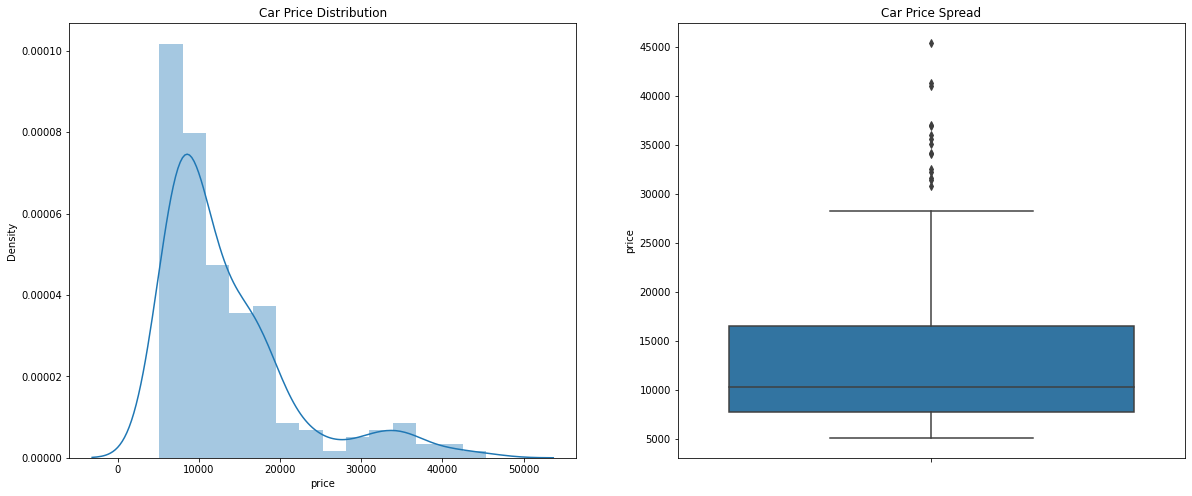

In [11]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution')
sns.distplot(cars.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars.price)

In [12]:
print(cars.price.describe(percentiles = [0.25,0.50,0.75,0.80,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
80%      17493.800000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


It seems like most car prices are below 16000 to 17000

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

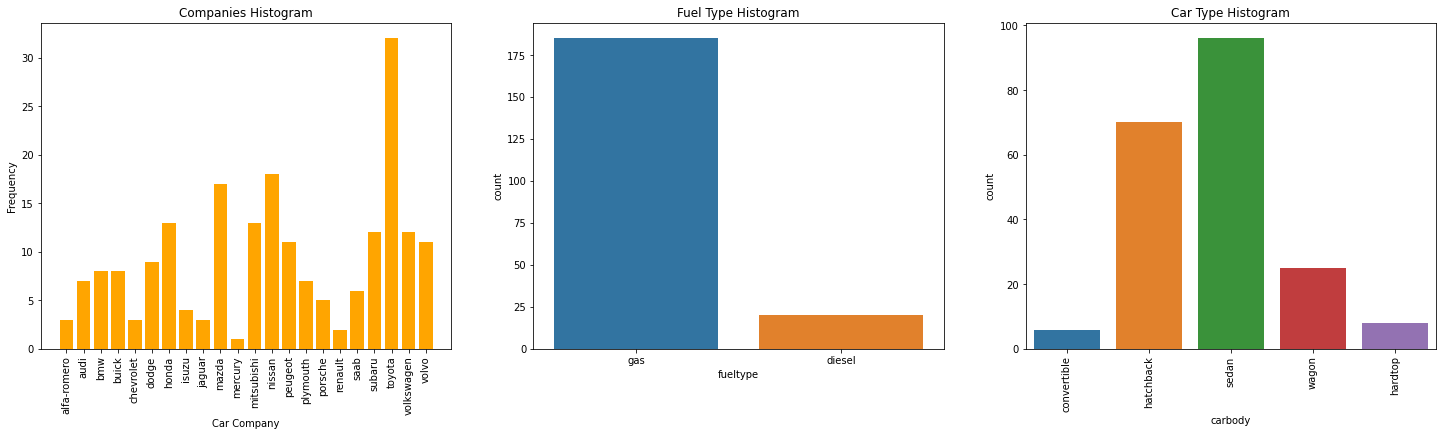

In [13]:
plt.figure(figsize=(25,6))

plt.subplot(1,3,1)
plt1 = cars.groupby('CompanyName')[['CompanyName']].count()
plt.title('Companies Histogram')
plt.xticks(rotation=90)
plt.xlabel('Car Company')
plt.ylabel('Frequency')
plt.bar(plt1.index,plt1.CompanyName,color='orange')

plt.subplot(1,3,2)
plt.title('Fuel Type Histogram')
sns.countplot(cars.fueltype)

plt.subplot(1,3,3)
plt.title('Car Type Histogram')
sns.countplot(cars.carbody)
plt.xticks(rotation=90)

## Inference:
1. Toyota seems to be favored car company
2. gas are more than diesl
3. sedan is the top car type

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


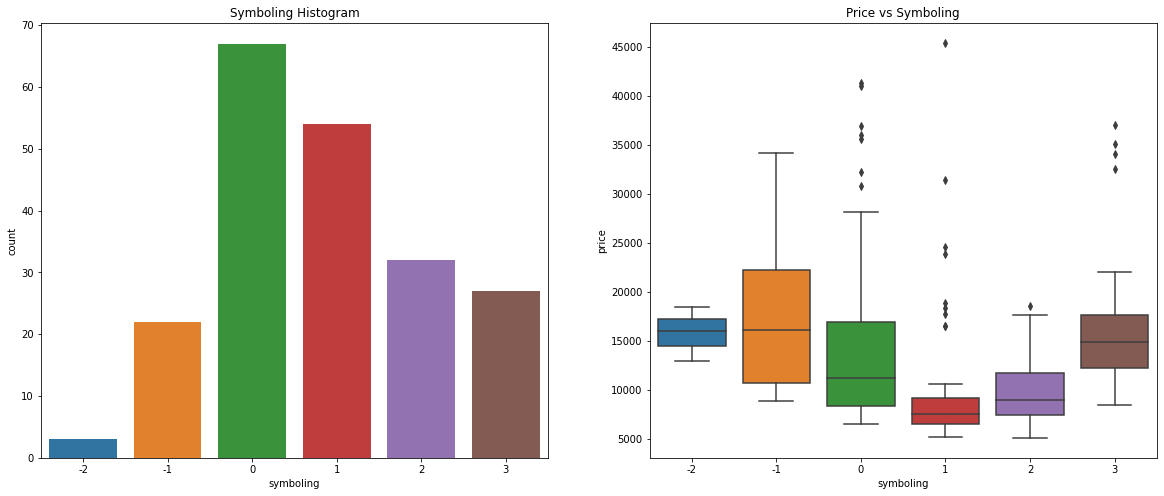

In [14]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
plt.xlabel('symboling')
plt.ylabel('count')
sns.countplot(cars.symboling)

plt.subplot(1,2,2)
plt.title('Price vs Symboling')
plt.ylabel('price')
plt.xlabel('symboling')
sns.boxplot(y=cars.price,x=cars.symboling)

### Inference:
1. Symboling with 0 and 1 have higher number of rows 2.The cars with -1 symboling are considered to have high prices. 
2. The cars with -1 symboling seems to be high priced 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


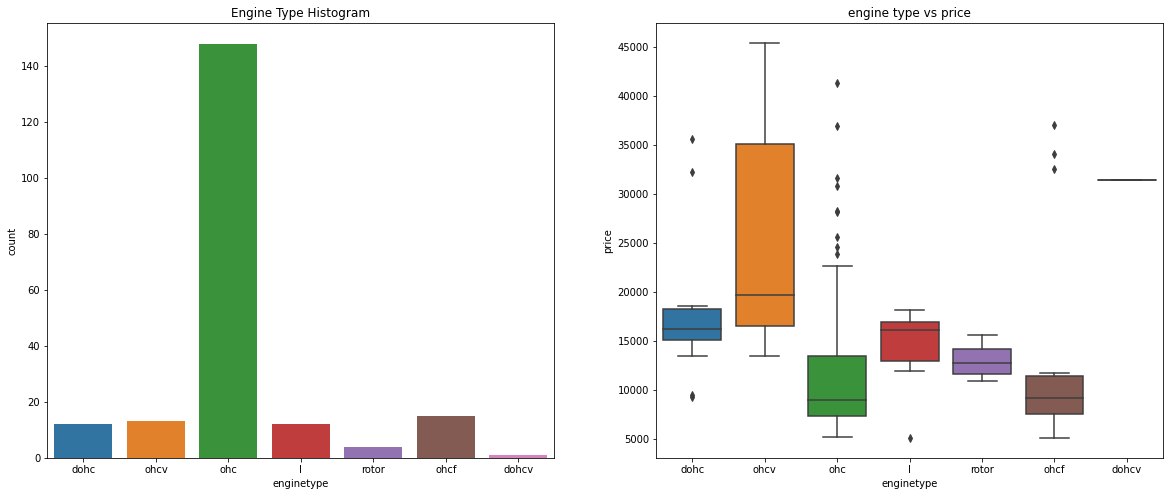

<BarContainer object of 7 artists>

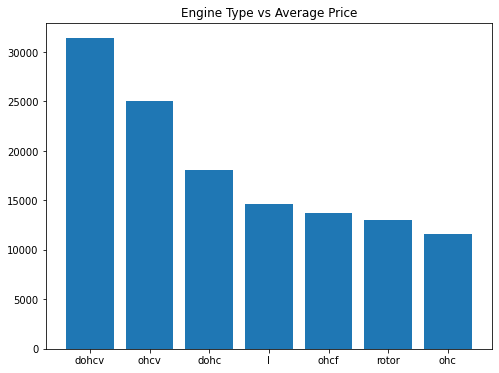

In [15]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
plt.xlabel('engine type')
plt.ylabel('count')
sns.countplot(cars.enginetype)

plt.subplot(1,2,2)
plt.title('engine type vs price')
plt.xlabel('engine type')
plt.ylabel('price')
sns.boxplot(x=cars.enginetype,y=cars.price)

plt.show()

plt.figure(figsize=(8,6))
avg_prc = cars.groupby('enginetype')[['price']].mean().sort_values('price',ascending=False)#burada 'price' dedigimiz buna gore sortla diyoruz yani.
plt.title('Engine Type vs Average Price')
plt.bar(avg_prc.index,avg_prc.price)

## Inference:

1. ohc engine type seems to be the favored one.
2. ohcv highest price range

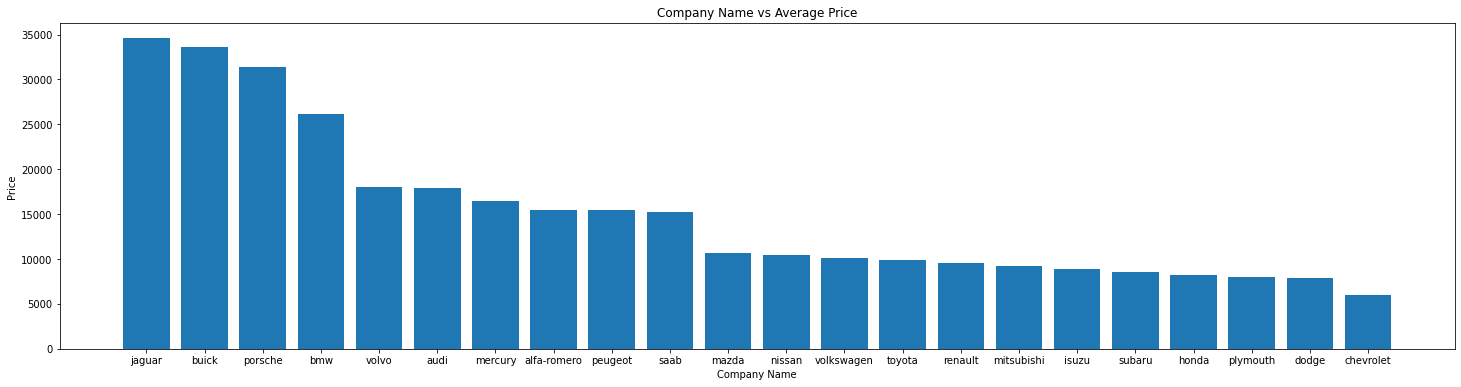

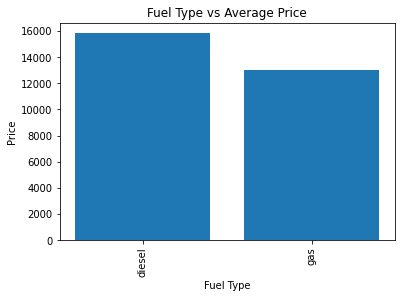

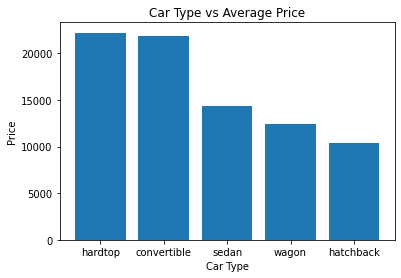

In [16]:
plt.figure(figsize=(25,6))

avg = cars.groupby('CompanyName')[['price']].mean().sort_values('price',ascending=False)
plt.title('Company Name vs Average Price')
plt.xlabel('Company Name')
plt.ylabel('Price')
plt.bar(avg.index,avg.price)

plt.show()

avg_fuel = cars.groupby('fueltype')[['price']].mean().sort_values('price',ascending=False)
plt.title('Fuel Type vs Average Price')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.bar(avg_fuel.index,avg_fuel.price)

plt.show()

avg_cartype = cars.groupby('carbody')[['price']].mean().sort_values('price',ascending=False)
plt.title('Car Type vs Average Price')
plt.xlabel('Car Type')
plt.ylabel('Price')
plt.bar(avg_cartype.index,avg_cartype.price)

plt.show()

## Inference:

1. Jaguar and Buick seem to have the highest prices
2. diesel is more expensive than gas
3. hardtop and convertible car types are the most expensive

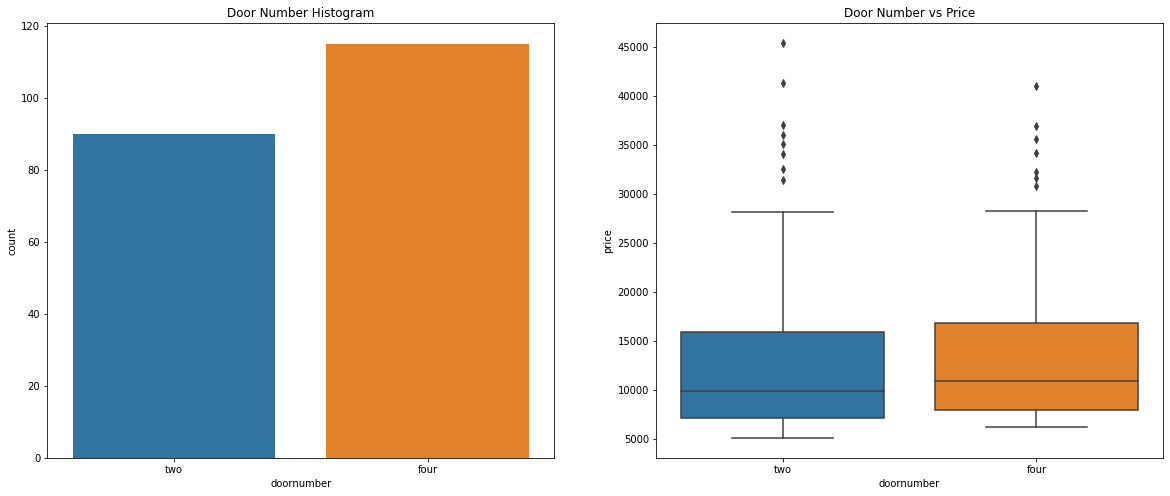

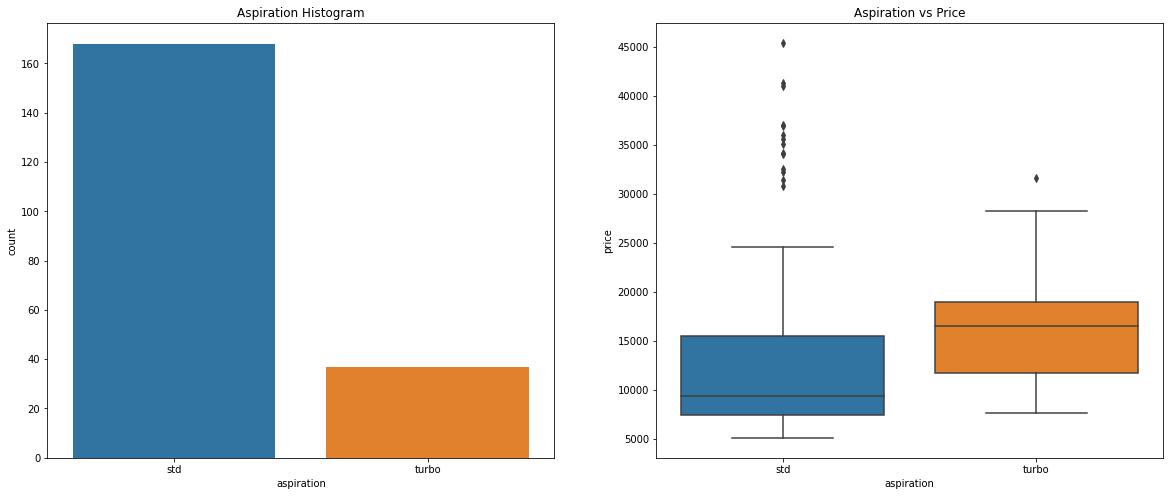

In [17]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
plt.xlabel('doornumber')
plt.ylabel('count')
sns.countplot(x=cars.doornumber)

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
plt.xlabel('doornumber')
plt.ylabel('price')
sns.boxplot(x=cars.doornumber,y=cars.price)

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
plt.xlabel('Aspiration')
plt.ylabel('Count')
sns.countplot(x=cars.aspiration)

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=cars.aspiration, y=cars.price)

## Inference:

1. doornumber variable is not affacting the price much. There is no sugnificant difference between the categories in it.
2. It seems aspiration with turbo have higher price range than the std(though it has some high values outside the whiskers.)

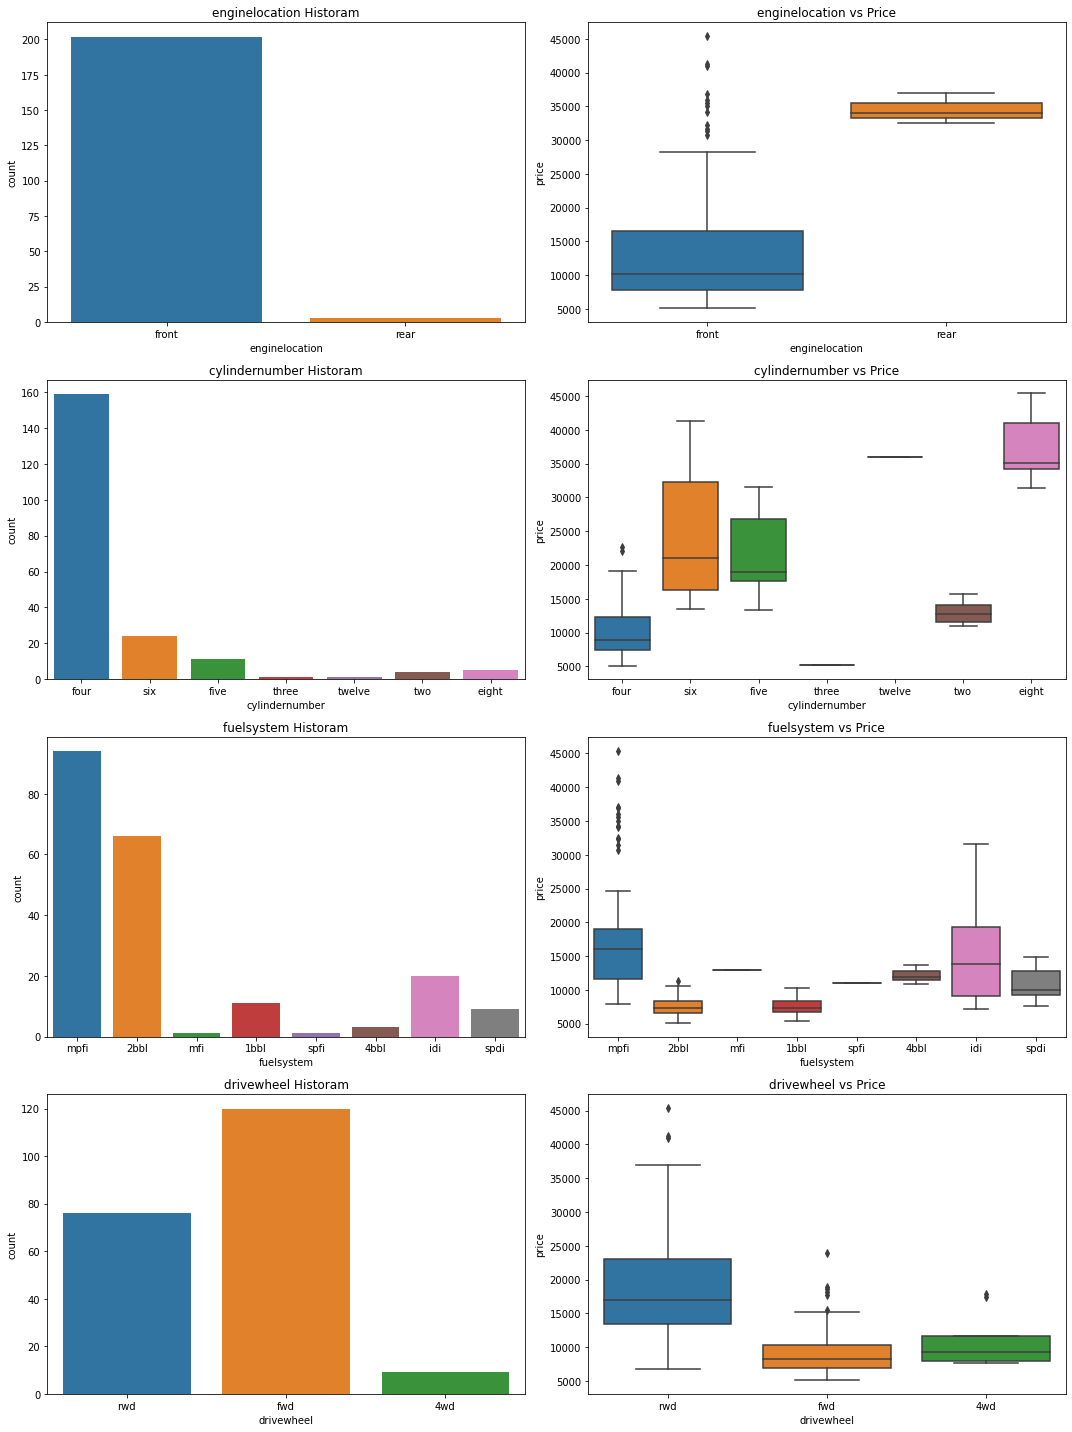

In [18]:
def func(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x + ' Historam')
    plt.xlabel('x')
    plt.ylabel('count')
    sns.countplot(x=cars[x])
    
    plt.subplot(4,2,(fig+1))
    plt.title(x+ ' vs Price')
    plt.xlabel(x)
    plt.ylabel('Price')
    sns.boxplot(x=cars[x],y=cars.price)
    
plt.figure(figsize=(15,20))

func('enginelocation', 1)
func('cylindernumber', 3)
func('fuelsystem', 5)
func('drivewheel', 7)
plt.tight_layout()

## Inference: 

1. Very few datapoints for enginelocation categories to make an inference.
2. Most common number of cylinders are four, six and five. Though eight cylinders have the highest price range.
3. mpfi and 2bbl are most common type of fuel systems. mpfi and idi having the highest price range. But there are few data for other categories to derive any meaningful inference
4. A very significant difference in drivewheel category. Most high ranged cars seeme to prefer rwd drivewheel.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

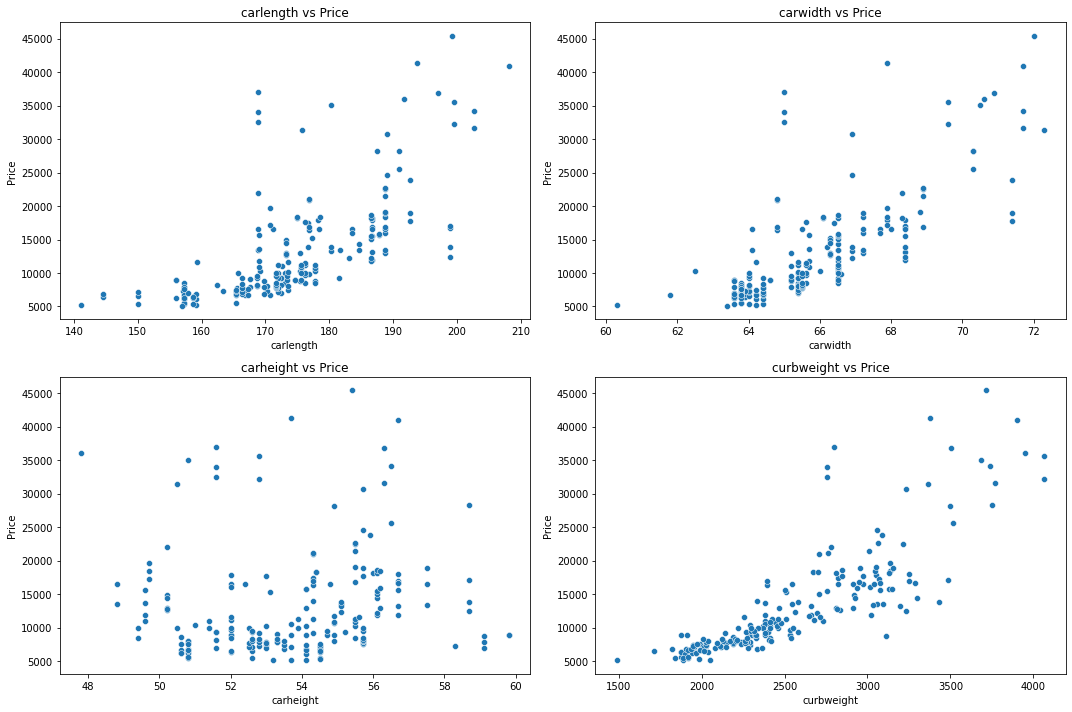

In [19]:
def scatter(x,fig):
    plt.subplot(2,2,fig)
    plt.title(x + ' vs Price')
    plt.xlabel(x)
    plt.ylabel('Price')
    sns.scatterplot(cars[x],cars.price)
    
plt.figure(figsize=(15,10))

scatter('carlength',1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)
plt.tight_layout()


## Inference: 

1. carwidth, carlength and curbweight seems to have a poitive correlation with price.
2. carheight doesn't show any significant trend with price.


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


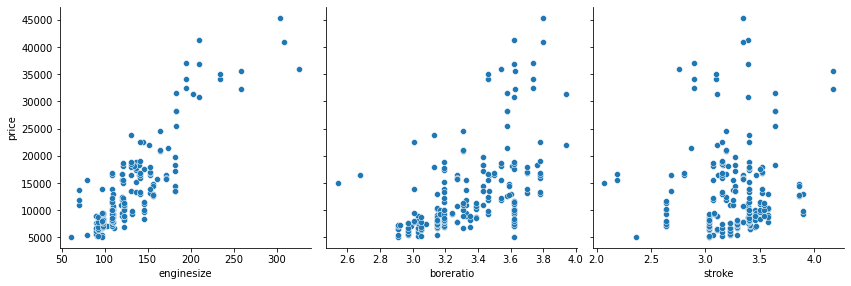

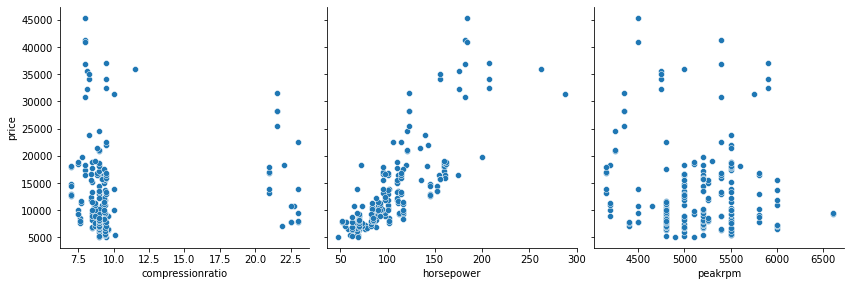

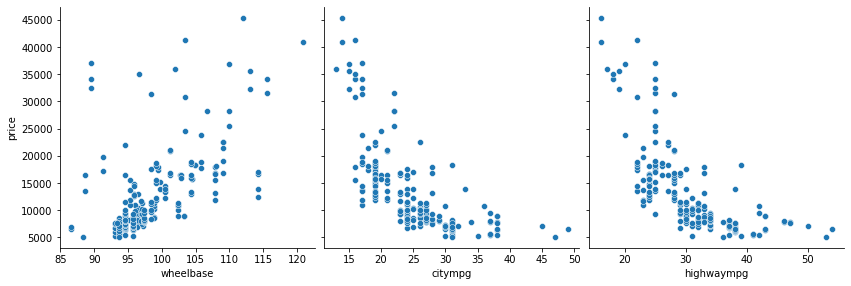

In [20]:
def pp(x,y,z):
    sns.pairplot(cars,x_vars=[x,y,z],y_vars='price',size=4)
    
pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')

## Inference:

1. enginesize, boreratio, horsepower, wheelbase - seem to have a significant positive correlation with price.
2. citympg, highwaympg - seem to have a significant negative correlation with price.

In [21]:
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [22]:
cars['price'] = cars['price'].astype('int')
temp = cars.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
cars['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
cars.head(10)

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carsrange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,Medium
5,6,2,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250,Medium
6,7,1,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710,Medium
7,8,1,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920,Medium
8,9,1,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875,Medium
9,10,0,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859,Medium


In [23]:
cars_lr = cars[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                'carlength','carwidth', 'carsrange']]
cars_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,carlength,carwidth,carsrange
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1,Medium
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1,Medium
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,171.2,65.5,Medium
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,176.6,66.2,Medium
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,176.6,66.4,Medium


In [53]:
X = cars_lr.iloc[:, 1:].values
Y = cars_lr.price.values

print(cars_lr.head())

   price fueltype aspiration      carbody drivewheel  wheelbase  curbweight  \
0  13495      gas        std  convertible        rwd       88.6        2548   
1  16500      gas        std  convertible        rwd       88.6        2548   
2  16500      gas        std    hatchback        rwd       94.5        2823   
3  13950      gas        std        sedan        fwd       99.8        2337   
4  17450      gas        std        sedan        4wd       99.4        2824   

  enginetype cylindernumber  enginesize  boreratio  horsepower  carlength  \
0       dohc           four         130       3.47         111      168.8   
1       dohc           four         130       3.47         111      168.8   
2       ohcv            six         152       2.68         154      171.2   
3        ohc           four         109       3.19         102      176.6   
4        ohc           five         136       3.19         115      176.6   

   carwidth carsrange  
0      64.1    Medium  
1      64.1   

In [54]:
cars_lr.isnull().values.any()#check if there is any null variable

print(X)

[['gas' 'std' 'convertible' 'rwd' 88.6 2548 'dohc' 'four' 130 3.47 111
  168.8 64.1 'Medium']
 ['gas' 'std' 'convertible' 'rwd' 88.6 2548 'dohc' 'four' 130 3.47 111
  168.8 64.1 'Medium']
 ['gas' 'std' 'hatchback' 'rwd' 94.5 2823 'ohcv' 'six' 152 2.68 154 171.2
  65.5 'Medium']
 ['gas' 'std' 'sedan' 'fwd' 99.8 2337 'ohc' 'four' 109 3.19 102 176.6
  66.2 'Medium']
 ['gas' 'std' 'sedan' '4wd' 99.4 2824 'ohc' 'five' 136 3.19 115 176.6
  66.4 'Medium']
 ['gas' 'std' 'sedan' 'fwd' 99.8 2507 'ohc' 'five' 136 3.19 110 177.3
  66.3 'Medium']
 ['gas' 'std' 'sedan' 'fwd' 105.8 2844 'ohc' 'five' 136 3.19 110 192.7
  71.4 'Medium']
 ['gas' 'std' 'wagon' 'fwd' 105.8 2954 'ohc' 'five' 136 3.19 110 192.7
  71.4 'Medium']
 ['gas' 'turbo' 'sedan' 'fwd' 105.8 3086 'ohc' 'five' 131 3.13 140 192.7
  71.4 'Medium']
 ['gas' 'turbo' 'hatchback' '4wd' 99.5 3053 'ohc' 'five' 131 3.13 160
  178.2 67.9 'Medium']
 ['gas' 'std' 'sedan' 'rwd' 101.2 2395 'ohc' 'four' 108 3.5 101 176.8
  64.8 'Highend']
 ['gas' 'std'

In [63]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0,1,2,3,6,7,13])],remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

[[1.0 0.0 0.0 1.0 0.0 1.0 1.0 0.0 1.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0
  0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0
  99.4 2824 136 3.19 115 176.6 66.4]
 [1.0 0.0 0.0 1.0 0.0 1.0 1.0 0.0 1.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0
  0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0
  115.6 3740 234 3.46 155 202.6 71.7]
 [1.0 0.0 0.0 1.0 0.0 1.0 1.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0
  1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0
  99.1 2707 121 2.54 110 186.6 66.5]
 [1.0 0.0 0.0 1.0 1.0 0.0 0.0 1.0 1.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0
  0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0
  97.0 2510 108 3.62 111 172.0 65.4]
 [1.0 0.0 0.0 1.0 0.0 1.0 1.0 0.0 1.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0
  1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0
  93.7 2191 98 2.97 68 167.3 63.8]
 [1.0 0.0 0.0 1.0 0.0 1.0 1.0 0.0 1.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0
  

In [57]:
from sklearn.preprocessing import StandardScaler
import sys

sc = StandardScaler()
print(X)

[[0.0 1.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0
  0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 88.6 2548 130 3.47 111
  168.8 64.1]
 [0.0 1.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0
  0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 88.6 2548 130 3.47 111
  168.8 64.1]
 [0.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0
  0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 94.5 2823 152 2.68 154
  171.2 65.5]
 [0.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0
  0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 99.8 2337 109 3.19 102
  176.6 66.2]
 [0.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0
  0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 99.4 2824 136 3.19 115
  176.6 66.4]
 [0.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0
  0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 99.8 2507 136 3.19 110
  177.3 66.3]
 [0.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 

In [58]:
X_train[:,29:]= sc.fit_transform(X_train[:, 29:])
X_test[:, 29:] = sc.transform(X_test[:, 29:])

print(X_train)

[[0.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0
  0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.08014770619767692
  0.47611427924999683 0.21184084908363948 -0.5348102367809011
  0.28612208111610954 0.1708429928924543 0.2311289159377882]
 [0.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0
  0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 2.7089924694815237
  2.2344492470709145 2.599432803131505 0.4585369647567846
  1.3417806031193031 2.3210039187879272 2.783825913817226]
 [0.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0
  0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.03146539576649268
  0.2515234591243993 -0.1536068989849114 -2.926201647890144
  0.15416476586571035 0.9978279643907131 0.2792930102373975]
 [0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0
  0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 -0.3093107772517831
  -0.1266337337366496 -0.47032828064432214 1.047187158260599
  0.180556228915790

In [59]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [60]:
pred = regressor.predict(X_test)
acc = regressor.score(X_test,Y_test)
print(acc)

0.841797595552285


In [75]:
for i in range(len(pred)):
  print('Prediction: ',pred[i],' Actual Result: ',Y_test[i])

Prediction:  7210.930514059535  Actual Result:  6795
Prediction:  18206.375946789525  Actual Result:  15750
Prediction:  14035.99909081947  Actual Result:  15250
Prediction:  953.2377835543739  Actual Result:  5151
Prediction:  11771.140595448347  Actual Result:  9995
Prediction:  12413.167385562352  Actual Result:  11199
Prediction:  6066.706333024218  Actual Result:  5389
Prediction:  5104.571726723563  Actual Result:  7898
Prediction:  16878.198924182758  Actual Result:  17199
Prediction:  7273.740968247461  Actual Result:  6529
Prediction:  23936.489837117835  Actual Result:  20970
Prediction:  44244.6250070626  Actual Result:  31400
Prediction:  12697.311494110663  Actual Result:  10945
Prediction:  13831.662998172262  Actual Result:  18344
Prediction:  6451.09246406873  Actual Result:  8916
Prediction:  11349.560204958241  Actual Result:  9989
Prediction:  8551.200572381056  Actual Result:  9295
Prediction:  17378.039014668037  Actual Result:  18920
Prediction:  8274.453272465853

In [62]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test,pred)
rmse = np.sqrt(mse)

print(rmse)

3499.630899562305


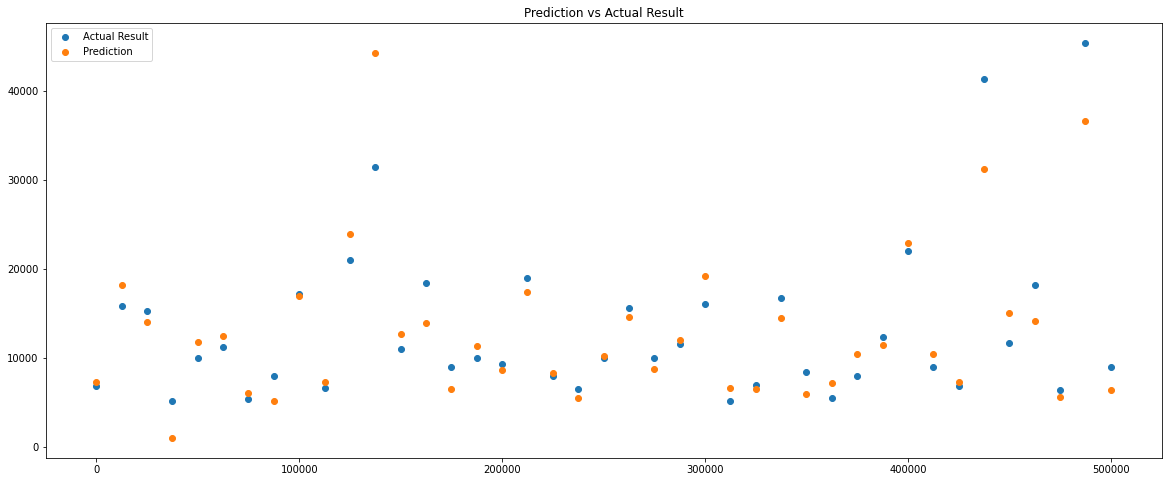

In [78]:
plt.figure(figsize=(20,8))

X_val = np.linspace(0,500000,41)#0'dan 50.000'e 41 tane sayii olacak sekilde bir array olusturdu.

plt.scatter(X_val,Y_test,label='Actual Result')
plt.scatter(X_val,pred,label='Prediction')
plt.title('Prediction vs Actual Result')
plt.legend()
plt.show()

We can see that almost all predictions are close to the actual value.